In [214]:
import pandas as pd

In [215]:
df = pd.read_csv("../Data/final_data.csv")
df

,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,past_wins_diff,surface_Clay,surface_Grass,surface_Hard,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_SF,target
0,-1.704919,-0.324874,-0.692203,-1.233859,0.729958,-0.579618,0.0,-0.285321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-0.852460,0.057331,0.346101,0.369681,-0.892171,0.637580,0.0,-0.251754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.000000,1.643481,-0.362984,-0.073141,0.000000,1.333122,0.0,0.251754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,1.172132,-0.401315,-0.075973,-0.325160,1.054383,-0.260828,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.385247,0.210213,0.050649,0.012323,0.000000,0.753504,0.0,-0.033567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33323,-0.319672,-1.127504,-0.244803,-0.052471,-0.000000,-1.854779,0.0,0.016784,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
33324,0.532787,0.955512,-0.211037,-0.136345,2.595405,-0.289809,0.0,-0.134269,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
33325,0.213115,-0.152882,0.008441,0.007155,0.000000,0.144905,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
33326,0.000000,-1.089284,1.890895,0.305682,0.000000,-1.651912,0.0,0.100701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [216]:
surf = list(df.columns[df.columns.str.contains('surface')])
round = list(df.columns[df.columns.str.contains('round')])

df = df.drop(columns=surf+round, axis=1)
df


,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,past_wins_diff,target
0,-1.704919,-0.324874,-0.692203,-1.233859,0.729958,-0.579618,0.0,-0.285321,0
1,-0.852460,0.057331,0.346101,0.369681,-0.892171,0.637580,0.0,-0.251754,0
2,0.000000,1.643481,-0.362984,-0.073141,0.000000,1.333122,0.0,0.251754,1
3,1.172132,-0.401315,-0.075973,-0.325160,1.054383,-0.260828,0.0,0.000000,1
4,1.385247,0.210213,0.050649,0.012323,0.000000,0.753504,0.0,-0.033567,1
...,...,...,...,...,...,...,...,...,...
33323,-0.319672,-1.127504,-0.244803,-0.052471,-0.000000,-1.854779,0.0,0.016784,0
33324,0.532787,0.955512,-0.211037,-0.136345,2.595405,-0.289809,0.0,-0.134269,1
33325,0.213115,-0.152882,0.008441,0.007155,0.000000,0.144905,0.0,0.000000,1
33326,0.000000,-1.089284,1.890895,0.305682,0.000000,-1.651912,0.0,0.100701,1


### Train_test_split

In [217]:
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.733968203680101


In [219]:
from sklearn.linear_model import LogisticRegression

# Best params: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
# Best score: 0.7339211185193197

model = LogisticRegression(C=0.01, penalty='l1', solver='saga')
model.fit(X_train, y_train)


LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [220]:
from sklearn.metrics import f1_score


print("train f1:", f1_score(y_train, model.predict(X_train)))
print("test  f1:", f1_score(y_test, model.predict(X_test)))

train f1: 0.7341450661089116
test  f1: 0.7224829674489024


In [221]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



preds = model.predict(X_test)

print(
    'accuracy_score: ',accuracy_score(y_test, preds),
    '\nrecall: ', recall_score(y_test, y_pred=preds),
    '\nprecision: ', precision_score(y_test, y_pred=preds),
    '\nf1: ', f1_score(y_test, preds)
    )

accuracy_score:  0.725022502250225 
recall:  0.7250075964752355 
precision:  0.71997585998793 
f1:  0.7224829674489024


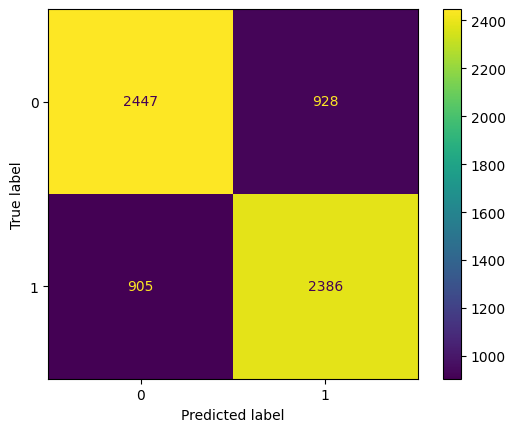

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# Decision Tree

## Random Forest

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [224]:
print("train f1:", f1_score(y_train, rf.predict(X_train)))
print("test  f1:", f1_score(y_test, rf.predict(X_test)))

train f1: 1.0
test  f1: 0.72597540610293


In [225]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1')
scores.mean(), scores.std()

(np.float64(0.7230031410390165), np.float64(0.006881719657981736))

## AdaBoost

In [226]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=300)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300)

In [227]:
print("train f1:", f1_score(y_train, ada.predict(X_train)))
print("test  f1:", f1_score(y_test, ada.predict(X_test)))

train f1: 0.7406662944351387
test  f1: 0.726089588377724


In [228]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)
scores = cross_val_score(ada, X_train, y_train, cv=cv, scoring='f1')
scores.mean(), scores.std()

(np.float64(0.7357122477955793), np.float64(0.004026093706030377))

In [229]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,

    max_depth=1, random_state=0).fit(X_train, y_train)

clf.fit(X_train, y_train)

print("train f1:", f1_score(y_train, clf.predict(X_train)))
print("test  f1:", f1_score(y_test, clf.predict(X_test)))

train f1: 0.7480881859215877
test  f1: 0.7320182094081943


## XgBoost

In [232]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',     
    n_estimators=   500,          
    learning_rate=0.05,        
    max_depth=5,               
    subsample=0.9,             
    colsample_bytree=0.9,      
    gamma=0.1,                 
    reg_lambda=5,              
    reg_alpha=0.1,             
    scale_pos_weight=1,        
    random_state=42,
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.744074407440744
F1 Score: 0.7411229135053111
